### Load image data

In [42]:
import cv2
import glob
import numpy as np
from skimage.feature import hog

# read image files from train folder and use hog function to get the feature vactors
train_hog=[]
for file in sorted(glob.glob('traffic/traffic-small/train/*.jpg')):
    img = cv2.imread(file,0)
    img = cv2.resize(img, (60, 30))
    h = hog(img, block_norm='L2')
    train_hog.append(h)
    
# read labels from training dataset
train_label=[]
with open('traffic/traffic-small/train.labels', mode='r') as f:
    for line in f:
        train_label.append(int(line))

In [44]:
len(train_label)

4209

### Standardize the dataset

In [45]:
from sklearn.preprocessing import StandardScaler

# standardise the data
train_hog_std = StandardScaler().fit_transform(train_hog)
train_hog_std.shape

(4209, 405)

### Apply PCA to reduce dimension of the dataset

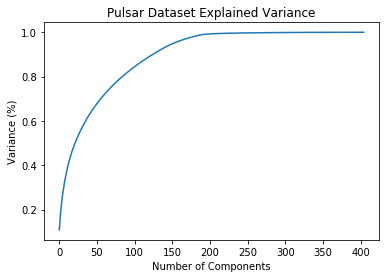

In [26]:
# find the appropriate component num. for PCA
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(train_hog_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [28]:
# implementing PCA method to reduce dimension
from sklearn import decomposition
pca = decomposition.PCA(n_components=200)
train_pca = pca.fit_transform(train_hog_std)
train_pca.shape

(100000, 200)

### Create model from the Sklearn and use GridSearchCV() to get the best parameter

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

# training kNN classifier via gridsearchCV with training dataset
knn = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
model = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(train_hog_std, train_label)


#pred = model.predict(hog_std_pca)
#pred

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [47]:
print(model.best_params_)

{'n_neighbors': 4}


### Get the prediction of train dataset

In [ ]:
# use the trained kNN classifier to get the predict labels
train_pred = model.predict(train_hog_std)


In [38]:
from sklearn.metrics import f1_score

f1_score(train_label, train_pred, average='micro')  

0.7738180090282728

### Processing the test dataset

In [ ]:
# read image files from test folder and use hog function to get the feature vactor
test_hog=[]
for file in sorted(glob.glob('traffic/traffic/test/*.jpg')):
    img = cv2.imread(file,0)
    img = cv2.resize(img, (60, 30))
    h = hog(img, block_norm='L2')
    test_hog.append(h)
    
# standardise the data
test_hog_std = StandardScaler().fit_transform(test_hog)
test_hog_std.shape

# implementing PCA method to reduce dimension
pca = decomposition.PCA(n_components=200)
test_pca = pca.fit_transform(test_hog_std)
test_pca.shape

# use the trained kNN classifier to get the predict labels
test_pred = model.predict(test_hog_std)

In [ ]:
import csv

# output label file
with open('prediction.dat', mode='w') as out:
    writer = csv.writer(out)
    for i in range(len(test_pred)):
        writer.writerow([test_pred[i]])